<a href="https://colab.research.google.com/github/iam-Dylan/automated-essay-scoring/blob/meo/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
# nltk.download('punkt')
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
stop=set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings('ignore')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### 1. EDA tổng quát

In [18]:
test  = pd.read_csv("drive/MyDrive/Colab Notebooks/data/test.csv")
train = pd.read_csv('drive/MyDrive/Colab Notebooks/data/train.csv')
test.head()

,essay_id,full_text
0,000d118,Many people have car where they live. The thin...
1,000fe60,I am a scientist at NASA that is discussing th...
2,001ab80,People always wish they had the same technolog...


In [19]:
data = train.copy()


### Tỉ lệ phân bố điểm trong lớp

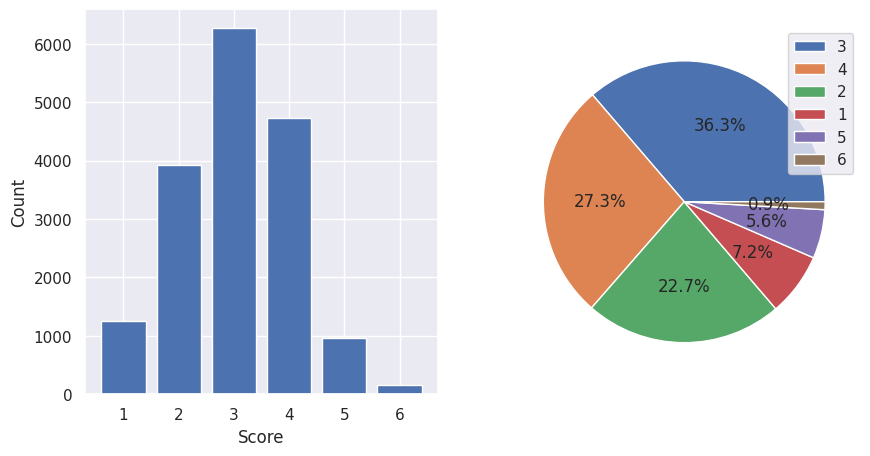

In [63]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].bar(data['score'].unique(), data['score'].value_counts())
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Count')

ax[1].pie(data['score'].value_counts(), autopct='%1.1f%%')
ax[1].legend(labels = data['score'].unique(), loc = 'upper right')
plt.show()

**Nhận xét**
- Phân bố điểm trong lớp có dạng gần với phân phối chuẩn
- Trong hơn 17000 bài viết chỉ có chưa đến 1% (khoảng 170 bài) đạt điểm tối đa.
- Điểm 3 trên thang điểm 6 có thể hiểu là đạt trung bình, chiếm 1/3 số bài.
- Tổng số bài đạt điểm 2,4 chiếm khoảng 50%


### Độ dài essay

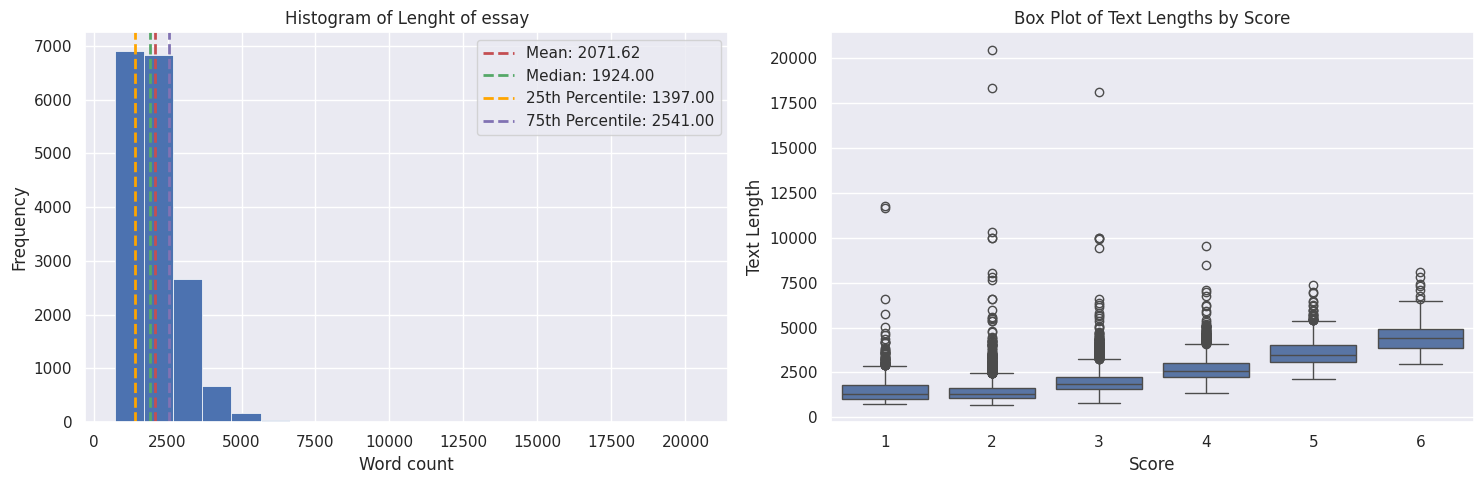

In [58]:
data['len_text'] = data['full_text'].str.len() ;
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(data['len_text'], bins=20, edgecolor='w', linewidth=0.5)
median_word_count = data['len_text'].median()
mean_word_count = data['len_text'].mean()
percentile_25 = np.percentile(data['len_text'], 25)
percentile_75 = np.percentile(data['len_text'], 75)
ax[0].set_title('Histogram of Lenght of essay')
ax[0].set_xlabel('Word count')
ax[0].set_ylabel('Frequency')
ax[0].axvline(mean_word_count, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_word_count:.2f}')
ax[0].axvline(median_word_count, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_word_count:.2f}')
ax[0].axvline(percentile_25, color='orange', linestyle='dashed', linewidth=2, label=f'25th Percentile: {percentile_25:.2f}')
ax[0].axvline(percentile_75, color='m', linestyle='dashed', linewidth=2, label=f'75th Percentile: {percentile_75:.2f}')
ax[0].legend()
sns.set_theme(style="darkgrid")
sns.boxplot(x='score', y='len_text', data=data, ax=ax[1])
ax[1].set_title('Box Plot of Text Lengths by Score')
ax[1].set_xlabel('Score')
ax[1].set_ylabel('Text Length')

plt.tight_layout()
plt.show()

- Phân phối độ dài đoạn văn bị lệch về phía dương vì mean > median
- Số lượng kí từ trong mỗi đoạn văn phần lớn dao động từ 1000 - 2500, chiếm 75% số bài
- Có một số ít đoạn văn rất dài, từ 5000 kí tự trở lên
- Theo boxplot, dường như có mối quan hệ giữa điểm số và độ dài đoạn văn , đoạn văn càng dài -> điểm càng cao

### Số từ mỗi essay

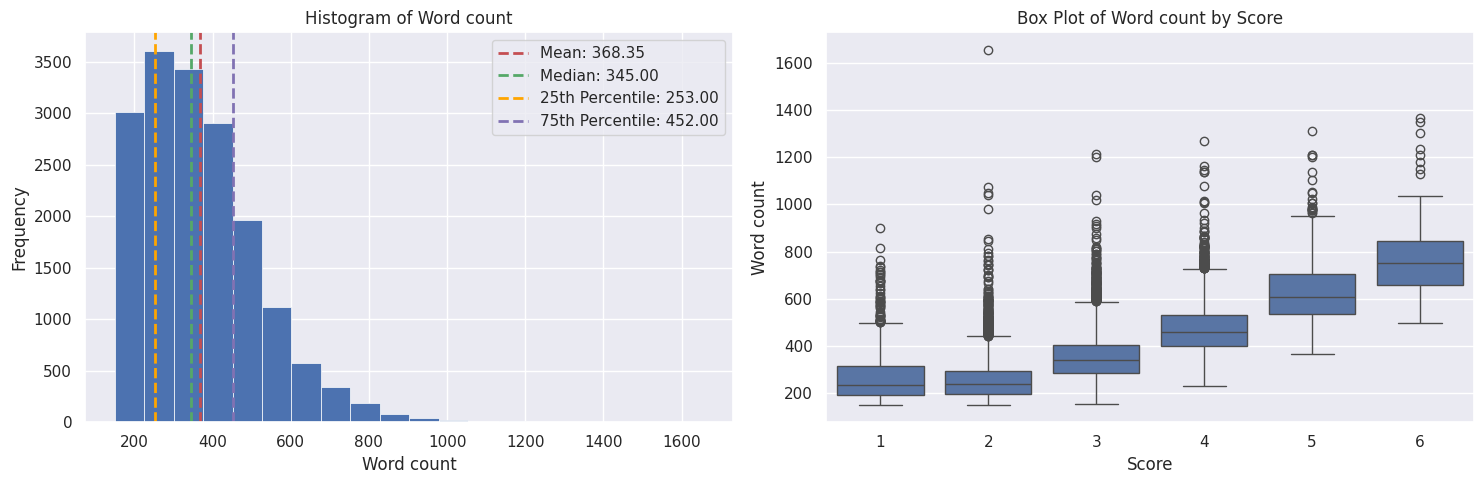

In [24]:
def word_count(df):
    df = df.split()
    return len(df)

data['word_count'] = data['full_text'].agg(word_count)
median_word_count = data['word_count'].median()
mean_word_count = data['word_count'].mean()
percentile_25 = np.percentile(data['word_count'], 25)
percentile_75 = np.percentile(data['word_count'], 75)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(data['word_count'], bins=20, edgecolor='w', linewidth=0.5)
ax[0].set_title('Histogram of Word count')
ax[0].set_xlabel('Word count')
ax[0].set_ylabel('Frequency')
ax[0].axvline(mean_word_count, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_word_count:.2f}')
ax[0].axvline(median_word_count, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_word_count:.2f}')
ax[0].axvline(percentile_25, color='orange', linestyle='dashed', linewidth=2, label=f'25th Percentile: {percentile_25:.2f}')
ax[0].axvline(percentile_75, color='m', linestyle='dashed', linewidth=2, label=f'75th Percentile: {percentile_75:.2f}')
ax[0].legend()


sns.set_theme(style="darkgrid")
sns.boxplot(x='score', y='word_count', data=data, ax=ax[1])
ax[1].set_title('Box Plot of Word count by Score')
ax[1].set_xlabel('Score')
ax[1].set_ylabel('Word count')

plt.tight_layout()
plt.show()


- Phân phối số từ trong đoạn văn bị lệch về phía dương vì mean > median
- Số lượng từ trong mỗi đoạn văn dao động từ 13 đến 1024.
- Đa số các đoạn văn có số lượng từ từ 200 đến 400, chiếm 75% số bài.
- Có một số ít đoạn văn có số lượng từ rất ngắn (dưới 100) hoặc rất dài (trên 800).
- Theo boxplot, dường như có mối quan hệ giữa điểm số và số lượng từ, số từ càng nhiều -> điểm càng cao

### Trung bình độ dài từ

In [26]:
data['mean_word_length'] = data['full_text'].map(lambda text: np.mean([len(word) for word in text.split()]))
data.head(10)

,essay_id,full_text,score,len_text,word_count,mean_word_length
0,000d118,Many people have car where they live. The thin...,3,2677,498,4.369478
1,000fe60,I am a scientist at NASA that is discussing th...,3,1669,332,4.018072
2,001ab80,People always wish they had the same technolog...,4,3077,550,4.574545
3,001bdc0,"We all heard about Venus, the planet without a...",4,2701,451,4.982262
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2208,373,4.873995
5,0030e86,If I were to choose between keeping the electo...,4,2374,400,4.890000
6,0033037,The posibilty of a face reconizing computer wo...,2,1031,179,4.754190
7,0033bf4,What is the Seagoing Cowboys progam?\n\nIt was...,3,1992,353,4.569405
8,0036253,The challenge of exploring Venus\n\nThis stori...,2,1870,310,5.003226
9,0040e27,There are many reasons why you should join sea...,3,1521,280,4.417857


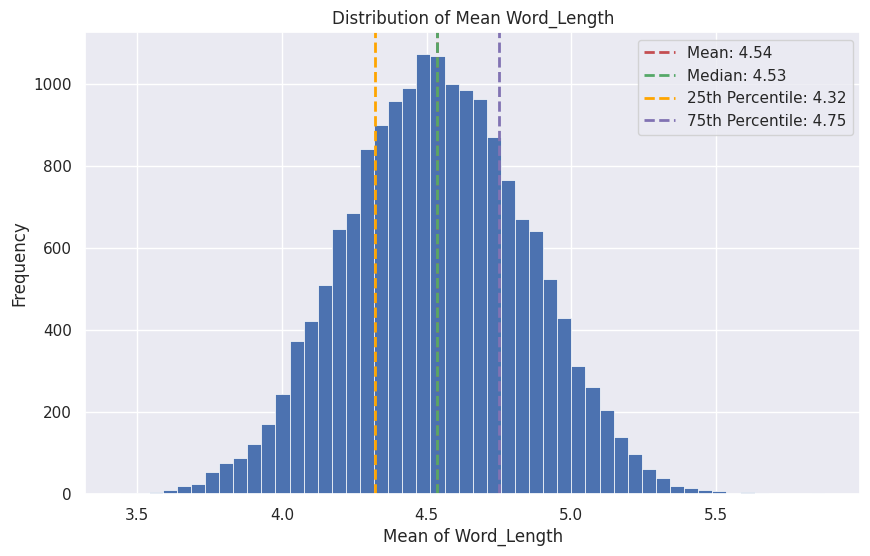

In [28]:
mean_val = data['mean_word_length'].mean()
median_val = data['mean_word_length'].median()
percentile_25 = np.percentile(data['mean_word_length'], 25)
percentile_75 = np.percentile(data['mean_word_length'], 75)

plt.figure(figsize=(10, 6))
plt.hist(data['mean_word_length'], bins=50, edgecolor='w', linewidth=0.5)
plt.axvline(mean_val, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(percentile_25, color='orange', linestyle='dashed', linewidth=2, label=f'25th Percentile: {percentile_25:.2f}')
plt.axvline(percentile_75, color='m', linestyle='dashed', linewidth=2, label=f'75th Percentile: {percentile_75:.2f}')
plt.title('Distribution of Mean Word_Length')
plt.xlabel('Mean of Word_Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Nhận xét**:
- Đồ thị có dạng phân phối chuẩn, không bị lệch
- Phần lớn các bài đều có trung bình độ dài từ nằm trong khoảng từ 4.3 - 4.7


### Trung bình độ dài câu

In [30]:
# mean of (length sentence
data['mean_sent_length'] = data['full_text'].map(lambda rev: np.mean([len(sent) for sent in sent_tokenize(rev)]))
data.head(5)

,essay_id,full_text,score,len_text,word_count,mean_word_length,sent_count,mean_sent_length
0,000d118,Many people have car where they live. The thin...,3,2677,498,4.369478,13,204.692308
1,000fe60,I am a scientist at NASA that is discussing th...,3,1669,332,4.018072,21,78.333333
2,001ab80,People always wish they had the same technolog...,4,3077,550,4.574545,24,126.750000
3,001bdc0,"We all heard about Venus, the planet without a...",4,2701,451,4.982262,20,133.950000
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2208,373,4.873995,15,145.266667
5,0030e86,If I were to choose between keeping the electo...,4,2374,400,4.890000,24,97.208333
6,0033037,The posibilty of a face reconizing computer wo...,2,1031,179,4.754190,7,146.142857
7,0033bf4,What is the Seagoing Cowboys progam?\n\nIt was...,3,1992,353,4.569405,26,74.653846
8,0036253,The challenge of exploring Venus\n\nThis stori...,2,1870,310,5.003226,18,102.444444
9,0040e27,There are many reasons why you should join sea...,3,1521,280,4.417857,23,64.956522


### Số lượng câu trong mỗi essay

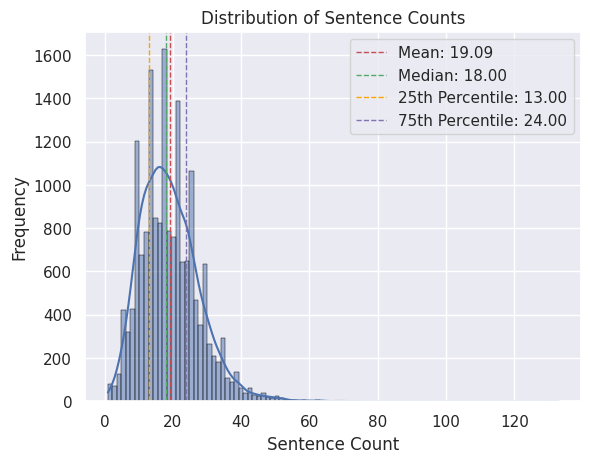

In [46]:
# def sent_count(df):
#     token = sent_tokenize(df, language='english')
#     return len(token)

# data['sent_count'] = data['full_text'].agg(sent_count)
mean_val = data['sent_count'].mean()
median_val = data['sent_count'].median()
percentile_25 = np.percentile(data['sent_count'], 25)
percentile_75 = np.percentile(data['sent_count'], 75)
# plt.hist(data['sent_count'], bins=100)
sns.histplot(data['sent_count'], bins=100, kde=True, edgecolor='black', color='b')
# plt.hist(data['sent_count'])
plt.axvline(mean_val, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.axvline(percentile_25, color='orange', linestyle='dashed', linewidth=1, label=f'25th Percentile: {percentile_25:.2f}')
plt.axvline(percentile_75, color='m', linestyle='dashed', linewidth=1, label=f'75th Percentile: {percentile_75:.2f}')
plt.title('Distribution of Sentence Counts')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- Đồ thị hơi lệch về phía dương vì mean > median, nhìn chung phân phối khá đều.
- Số lượng câu phổ biến nhất trong đoạn văn là 18 câu.
- Khoảng 75% số bài có số lượng câu ngắn, dưới 20 câu.
- Một số ít bài có số lượng câu dài trên 40 câu.


### Tương quan giữa các cột

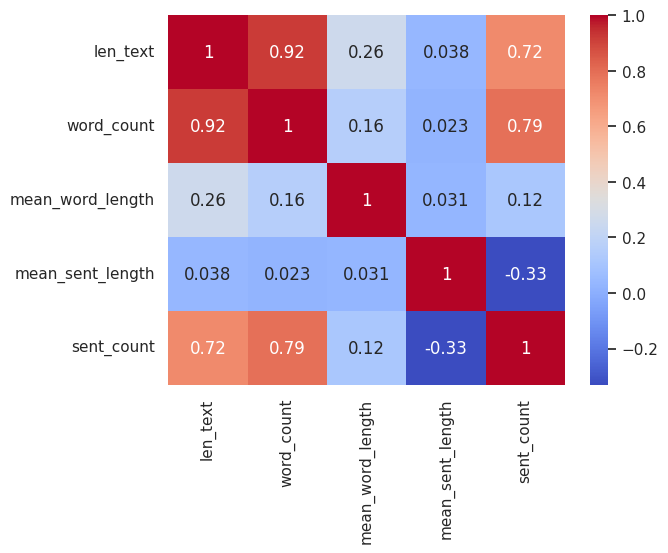

In [47]:
col = ['len_text', 'word_count', 'mean_word_length', 'mean_sent_length','sent_count']
sns.heatmap(data[col].corr(), annot = True, cmap = 'coolwarm')
plt.show()


Từ heat map:
- Cột `len_text` và cột `word_count` có độ tương quan rất cao, cho thấy khi độ dài đoạn essay tăng thì số lượng từ sẽ tăng.
 -> Có thể loại bỏ 1 trong hai cột này khi xây dựng model để tránh hiện tượng đa cộng tuyến.
- Tương quan giữa cột `sent_count` - `len_text` và `sent_count` - `word_count` có độ tương quan trung bình
- Hai cặp `mean_sent_length` - `word_count` và `mean_sent_length` - `len_text` hầu như không có tương quan


### Mối quan hệ giữa các cặp thuộc tính khác

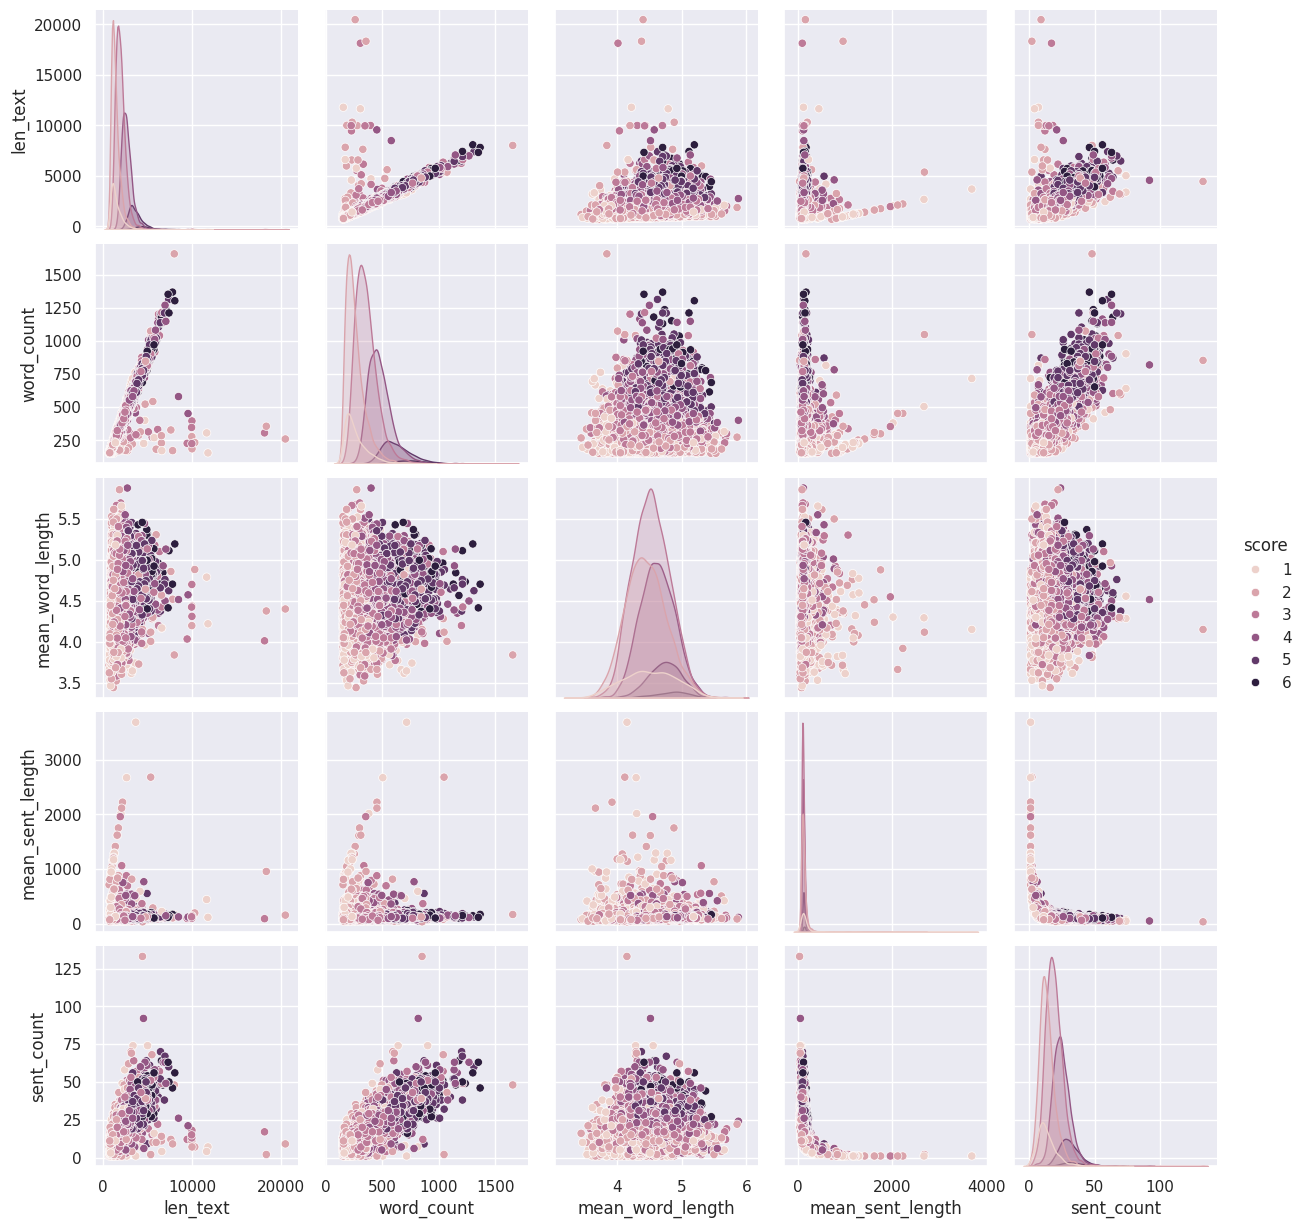

In [48]:
col = ['len_text', 'word_count', 'mean_word_length', 'mean_sent_length','sent_count', 'score']
sns.pairplot(data[col], hue ='score') # hue - label
plt.show()


### 2. EDA về nội dung

#### Trực quan tần suất các từ bằng wordcloud

In [ ]:
# function to plot world cloud:
def plot_wordcloud(df, column, title, stopwords):

    # Define stopwords
    stopwords = stop

    # Define the Wordcloud
    wordcloud = WordCloud(width = 800,
                          height = 800,
                          background_color ='black',
                          min_font_size = 10,
                          stopwords = stopwords).generate(' '.join(df[column]))

    # Plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title('Wordcloud: ' + title, fontsize = 20)

    plt.show()



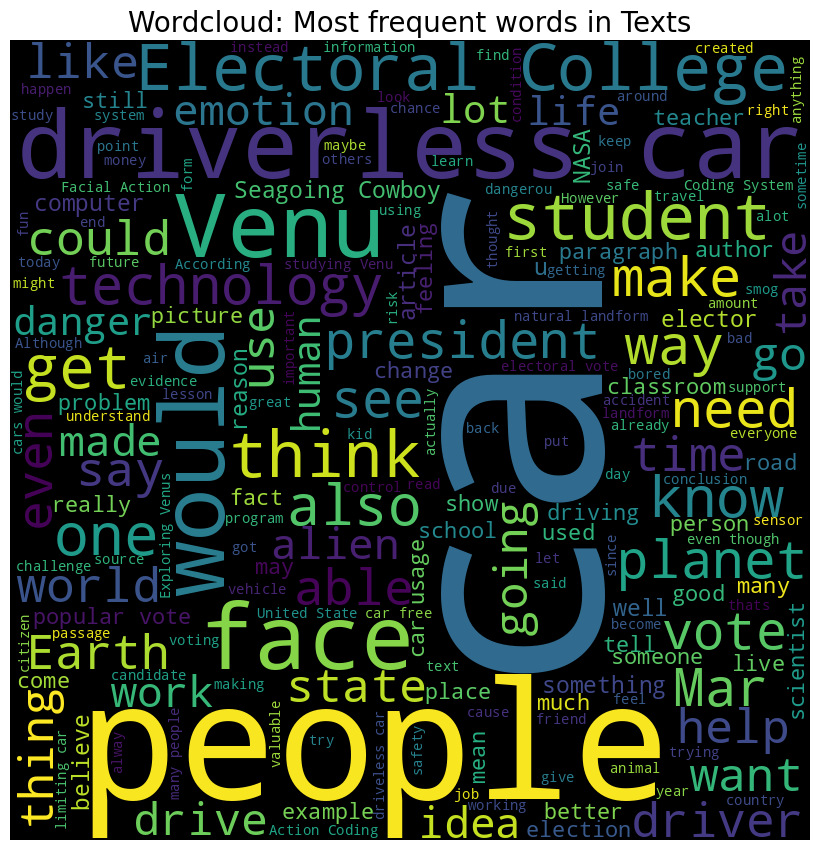

In [ ]:
plot_wordcloud(data,column = 'full_text', title = 'Most frequent words in Texts', stopwords = stop)

Nhận xét:
- Bằng wordcloud có thể nhận ra một số từ được dùng nhiều ví dụ như : car, people..
- Wordcloud cho ta một cái nhìn tổng thể về tần suất, có thể thấy từ dùng nhiều nhất bởi nó có kích cỡ to nhất. Tuy nhiên nó chỉ có tác dụng trực quan, không có số liệu rõ ràng để ta phân tích.

&rarr; Ta đến với mô hình N-gram để có cái nhìn rõ hơn về dữ liệu

#### Unigram

#### Unigram khi chưa lọc ra các stopword ( bên trái) và sau khi lọc stopword (bên phải)

In [59]:
#  Unigram - Tan so 1 tu khi chua loc stop word

texts = data['full_text']
vec = CountVectorizer(ngram_range=(1,1)).fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
top_20_words = pd.DataFrame(words_freq[:20], columns=['word', 'freq'])

#  Unigram - Tan so 1 tu khi da loc stop word
vec_sw = CountVectorizer(ngram_range=(1,1), stop_words = 'english').fit(texts)
bag_of_words_sw = vec_sw.transform(texts)
sum_words_sw = bag_of_words_sw.sum(axis=0)
words_freq_sw = [(word, sum_words_sw[0, idx]) for word, idx in vec_sw.vocabulary_.items()]
words_freq_sw = sorted(words_freq_sw, key = lambda x: x[1], reverse=True)
top_20_words_sw = pd.DataFrame(words_freq_sw[:20], columns=['word', 'freq'])

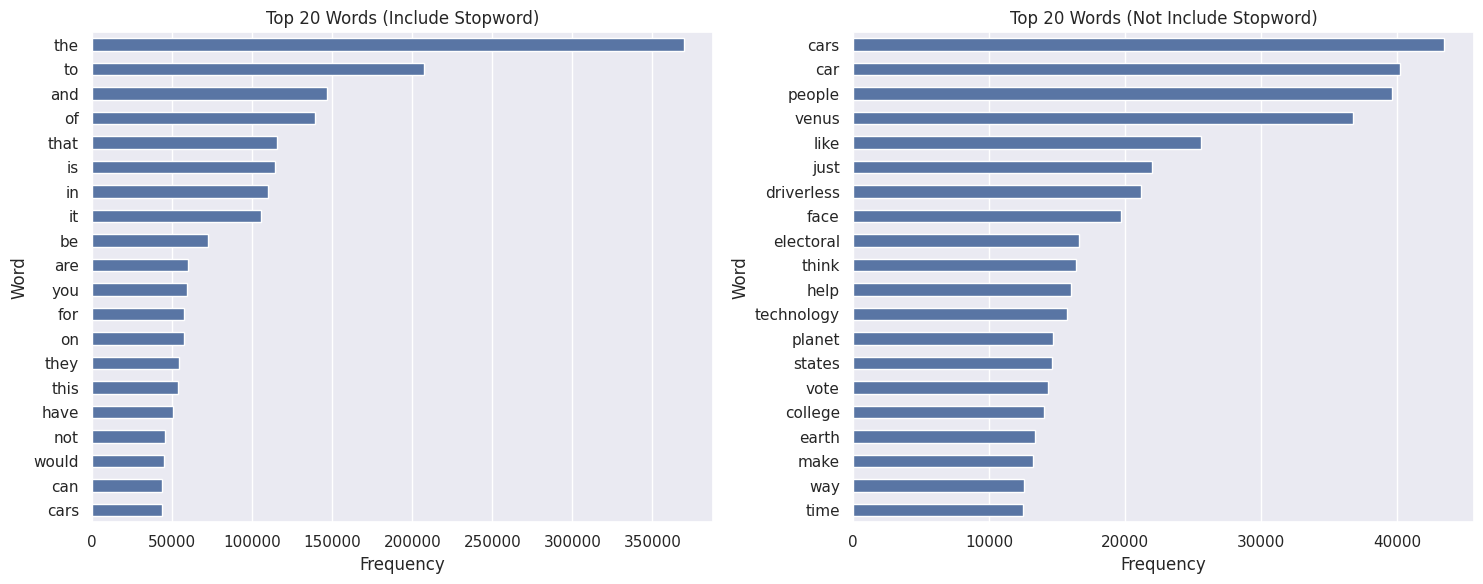

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='freq', y='word', data=top_20_words, orient='h', ax=ax[0], width=0.5)
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Word')
ax[0].set_title('Top 20 Words (Include Stopword)')

sns.barplot(x='freq', y='word', data=top_20_words_sw, orient='h', ax=ax[1], width=0.5)
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Word')
ax[1].set_title('Top 20 Words (Not Include Stopword)')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Nhận xét:
- Stopword chiếm số lượng khác lớn trong đoạn văn.
- Stopword được dùng nhiều nhất là 'the', lên đến 350000 lần, gấp 10 lần 'cars' (từ có số lần xuất hiện nhiều nhất sau khi loại bỏ stopword)
- Biểu đồ unigram có sự khác biệt lớn sau khi loại bỏ các stopword.
- Từ biểu đồ bên dưới có thể nhận thấy phần lớn nội dung essay có lẽ là về car vì các từ được dùng nhiều nhất đều có liên quan đến xe.

#### Bigram

In [53]:
vec = CountVectorizer(ngram_range=(2,2)).fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
top_20_words2 = pd.DataFrame(words_freq[:20], columns=['word', 'freq'])

vec_sw = CountVectorizer(ngram_range=(2,2), stop_words = 'english').fit(texts)
bag_of_words_sw = vec_sw.transform(texts)
sum_words_sw = bag_of_words_sw.sum(axis=0)
words_freq_sw = [(word, sum_words_sw[0, idx]) for word, idx in vec_sw.vocabulary_.items()]
words_freq_sw = sorted(words_freq_sw, key = lambda x: x[1], reverse=True)
top_20_words_sw2 = pd.DataFrame(words_freq_sw[:20], columns=['word', 'freq'])

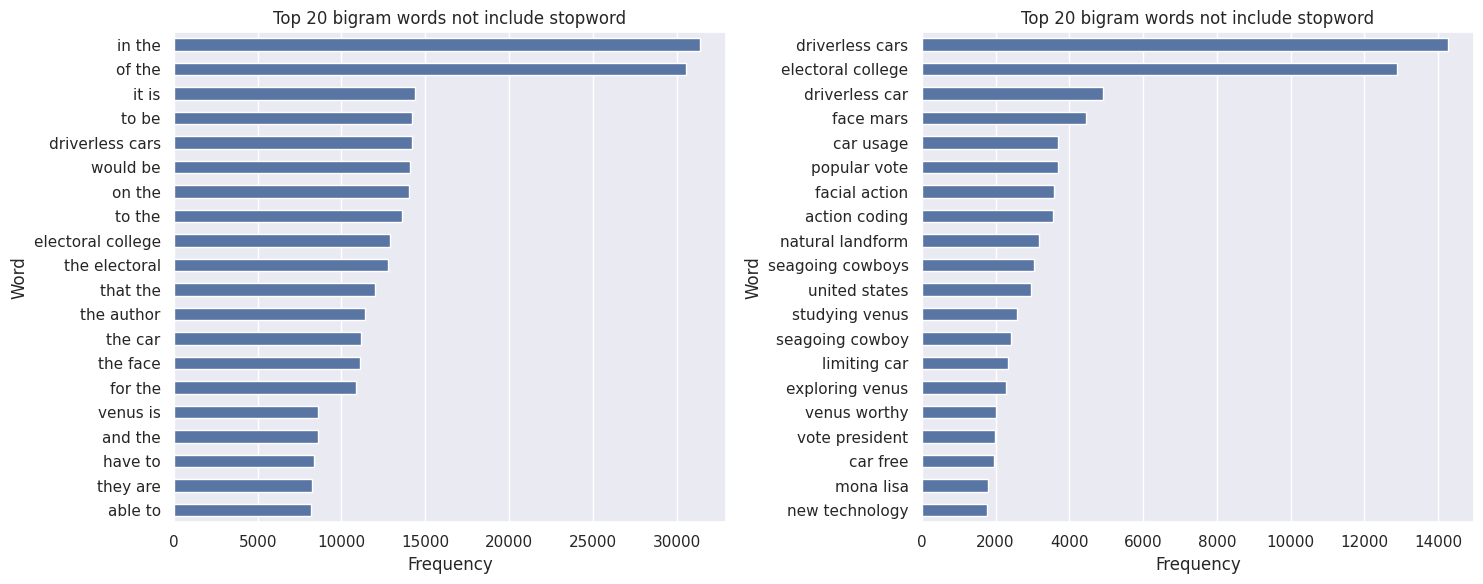

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='freq', y='word', data=top_20_words2, orient='h', ax=ax[0], width=0.5)
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Word')
ax[0].set_title('Top 20 bigram words not include stopword')

sns.barplot(x='freq', y='word', data=top_20_words_sw2, orient='h', ax=ax[1], width=0.5)
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Word')
ax[1].set_title('Top 20 bigram words not include stopword')
plt.tight_layout()
plt.show()

Nhận xét:
- So với mô hình unigram, tần suất ở mô hình bigram giảm đi khá nhiều
- Stopword được dùng nhiều nhất là 'in the', lên đến 30000 lần, gấp đôi lần 'driveless cars' (từ có số lần xuất hiện nhiều nhất sau khi loại bỏ stopword)
- Các cặp bigram phổ biến khi chưa loại bỏ stopword: gồm các giới từ, and*, that*,the*.
- Biểu đồ bigram có sự khác biệt lớn sau khi loại bỏ các stopword.
- Biểu đồ bên phải thấy được phần lớn các essay là về chủ đề car

#### Trigram

In [55]:
vec = CountVectorizer(ngram_range=(3,3)).fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
top_20_words3 = pd.DataFrame(words_freq[:20], columns=['word', 'freq'])

vec_sw = CountVectorizer(ngram_range=(3,3), stop_words = 'english').fit(texts)
bag_of_words_sw = vec_sw.transform(texts)
sum_words_sw = bag_of_words_sw.sum(axis=0)
words_freq_sw = [(word, sum_words_sw[0, idx]) for word, idx in vec_sw.vocabulary_.items()]
words_freq_sw = sorted(words_freq_sw, key = lambda x: x[1], reverse=True)
top_20_words_sw3 = pd.DataFrame(words_freq_sw[:20], columns=['word', 'freq'])

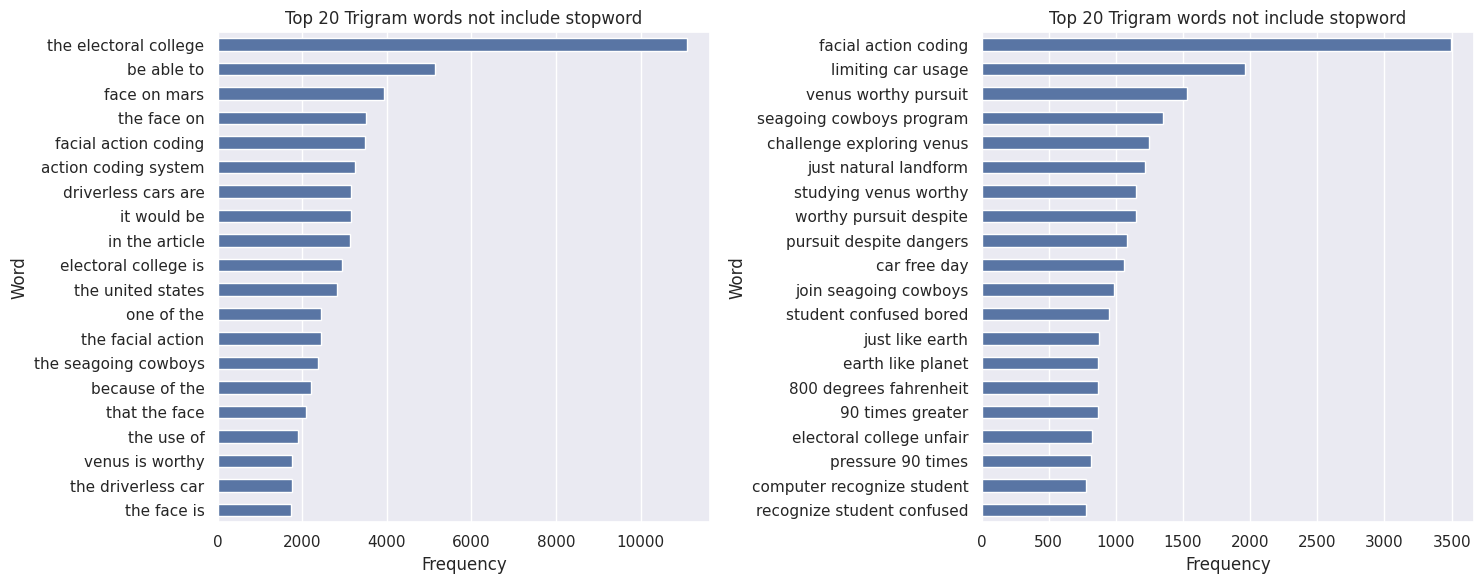

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='freq', y='word', data=top_20_words3, orient='h', ax=ax[0], width=0.5)
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Word')
ax[0].set_title('Top 20 Trigram words not include stopword')

sns.barplot(x='freq', y='word', data=top_20_words_sw3, orient='h', ax=ax[1], width=0.5)
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Word')
ax[1].set_title('Top 20 Trigram words not include stopword')
plt.tight_layout()
plt.show()

Nhận xét:
- So với hai mô hình trên, tần suất ở mô hình triigram giảm đi khá nhiều.
- Các stopword xuất hiện trong mô hình trigram giảm đáng kể.
- Top 20 các từ sử dụng nhiều nhất ở biểu đồ bên trái đều là từ có nghĩa, có thể hình dung được từ đó nói về những gì.
- Khi tăng số lượng N, ta có hình dung được các chủ đề hay xuất hiện trong đoạn văn : car, planet, school... (hai mô hình trước ta chỉ thấy được chủ đề car)